In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../eval_speed_101 sharps_2.csv")


In [4]:
df.groupby('action_result')['action'].count()

action_result
FORWARD     9271
GOAL          68
HIT_TREE      31
MOVE        2239
Name: action, dtype: int64

In [5]:
df.head()

,action,action_result,distance_to_goal,experiment,gamma,loss,orientation,reward,signal1,signal2,signal3,speed,time
0,-18,MOVE,283.809795,1,0.96,1.088013e-01,0.160011,-0.3,0.0,0.0,0.0,3,1
1,-18,FORWARD,280.866448,1,0.96,3.211688e+06,0.061632,0.2,0.0,0.0,0.0,3,2
2,-18,FORWARD,277.887706,1,0.96,1.375310e-01,-0.037713,0.2,0.0,0.0,0.0,3,3
3,6,FORWARD,275.168618,1,0.96,2.902373e+06,-0.138120,0.2,0.0,0.0,0.0,3,4
4,6,FORWARD,272.335959,1,0.96,2.678600e+06,-0.106245,0.2,0.0,0.0,0.0,3,5


In [9]:
ANGLE = 20
angles_cols = ['angle_'+str(i) for i in range(-ANGLE,ANGLE+1)]


In [10]:
df['obstacle_detected']=df[angles_cols].apply(lambda x:any(x<25),axis=1)

KeyError: "None of [Index(['angle_-20', 'angle_-19', 'angle_-18', 'angle_-17', 'angle_-16',\n       'angle_-15', 'angle_-14', 'angle_-13', 'angle_-12', 'angle_-11',\n       'angle_-10', 'angle_-9', 'angle_-8', 'angle_-7', 'angle_-6', 'angle_-5',\n       'angle_-4', 'angle_-3', 'angle_-2', 'angle_-1', 'angle_0', 'angle_1',\n       'angle_2', 'angle_3', 'angle_4', 'angle_5', 'angle_6', 'angle_7',\n       'angle_8', 'angle_9', 'angle_10', 'angle_11', 'angle_12', 'angle_13',\n       'angle_14', 'angle_15', 'angle_16', 'angle_17', 'angle_18', 'angle_19',\n       'angle_20'],\n      dtype='object')] are in the [columns]"

In [8]:
df.groupby('obstacle_detected').count()

KeyError: 'obstacle_detected'

### Q: Bat would less likeily to move towards angle with shorter distance to obstacle?

#### Method 1: Given action, what is the average distance to obstacle for that angle ?



In [54]:
tmp_df = df[df['obstacle_detected']==True].groupby('action')[angles_cols].mean()

In [1]:
tmp_df = df[df['obstacle_detected']==True]

NameError: name 'df' is not defined

In [123]:
df[df['obstacle_detected']==True].groupby('action')[angles_cols].mean()

,angle_-20,angle_-19,angle_-18,angle_-17,angle_-16,angle_-15,angle_-14,angle_-13,angle_-12,angle_-11,...,angle_11,angle_12,angle_13,angle_14,angle_15,angle_16,angle_17,angle_18,angle_19,angle_20
action,,,,,,,,,,,,,,,,,,,,,
-20,18.533040,18.563877,18.511013,18.480176,18.511013,18.493392,18.744493,18.762115,18.541850,18.942731,...,17.202643,17.189427,16.977974,16.982379,16.938326,16.969163,17.356828,17.312775,17.242291,17.176211
-19,17.666667,17.750000,17.750000,17.916667,17.916667,17.916667,15.041667,14.833333,15.125000,15.041667,...,13.833333,13.833333,13.833333,13.833333,13.833333,13.833333,13.833333,13.833333,13.833333,13.833333
-18,21.247809,21.159363,21.022311,20.906773,20.811155,20.764940,20.633466,20.508367,20.406375,20.349004,...,17.945817,17.835060,17.769721,17.662948,17.550598,17.383267,17.328287,17.229482,17.067729,16.907570
-17,17.157044,17.224018,17.207852,17.166282,17.274827,17.316397,17.376443,17.399538,17.457275,17.309469,...,17.394919,17.575058,17.648961,17.672055,17.736721,17.796767,17.916859,17.997691,18.027714,18.071594
-16,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
-15,12.888889,12.888889,12.888889,12.888889,13.111111,13.111111,13.111111,13.111111,13.333333,13.333333,...,16.666667,16.888889,16.888889,16.888889,17.000000,17.222222,17.222222,17.222222,17.555556,17.666667
-14,13.163265,12.653061,12.571429,12.469388,12.346939,12.102041,12.000000,11.979592,11.938776,11.877551,...,11.183673,11.346939,11.408163,11.428571,11.469388,11.510204,11.632653,11.755102,11.816327,11.836735
-13,22.500000,22.000000,22.000000,22.000000,22.000000,22.000000,21.500000,21.500000,21.500000,21.500000,...,20.500000,20.500000,20.500000,20.500000,20.500000,20.500000,20.500000,20.500000,20.500000,20.000000
-12,12.225806,12.258065,12.161290,12.193548,12.193548,12.354839,12.548387,12.548387,12.548387,12.225806,...,11.612903,11.774194,11.870968,11.935484,12.193548,12.387097,12.709677,13.032258,12.741935,13.032258


In [102]:
L = []
for i in range(tmp_df.shape[0]):
    action = tmp_df.iloc[i].action
    distance = tmp_df.iloc[i]['angle_'+str(action)]
    other_distance = []
    for i in range(-ANGLE,ANGLE + 1):
        if i != action:
            other_distance.append(tmp_df.iloc[i]['angle_'+str(i)])
#     assert(len(other_distance) == 40)
    
    L.append([distance,other_distance])

In [106]:
N = len(L)
A = sum([i[0] for i in L])
B = sum([sum(i[1])/40 for i in L])

In [107]:
A/N

19.009485771342984

In [108]:
B/N

17.452976784822177

/Users/ethanchen/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


KeyboardInterrupt: 

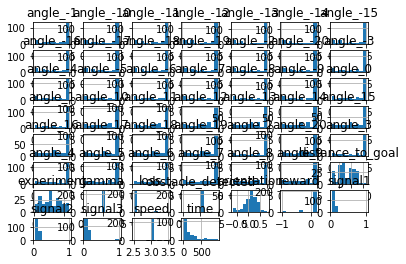

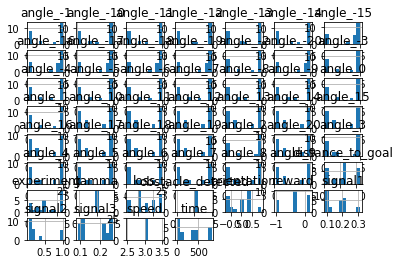

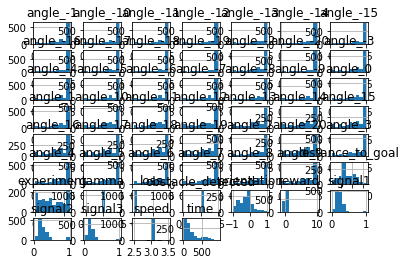

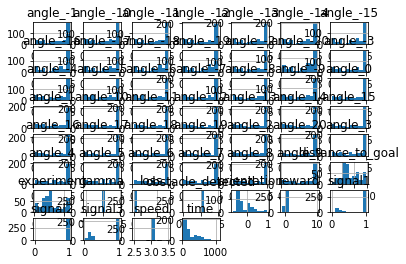

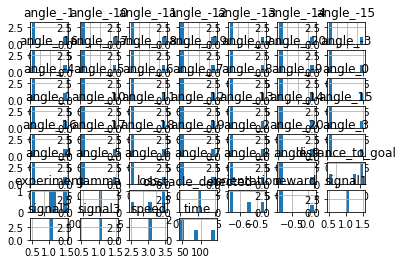

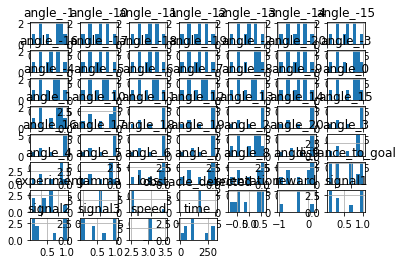

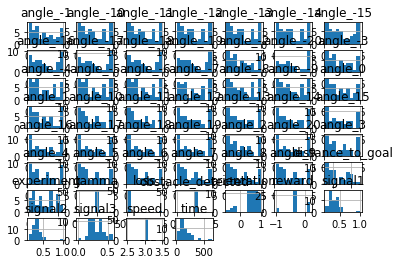

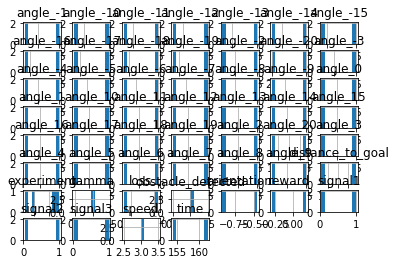

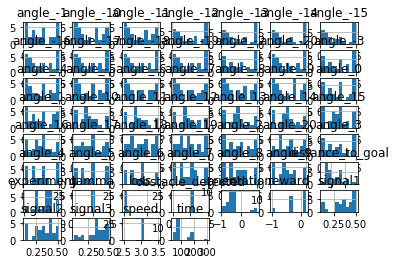

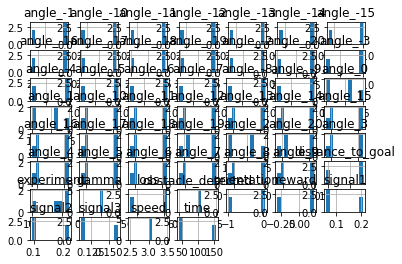

In [124]:
tmp_df.groupby('action').hist()

### Thrid - Q: Relationship between the angle and speed?
### Q: Relationship between the density and success rate? (define the density , ie percentage of cells being 1,number of obstacle).



### First thing - task: Change shape file to cross section.  Done
### Second thing - task: Evalutate of shape file.  Done

### Bonus: Do bat prefer wider gaps than the narrower gaps?

